In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
df.shape

(178, 13)

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check apakah ada outliers

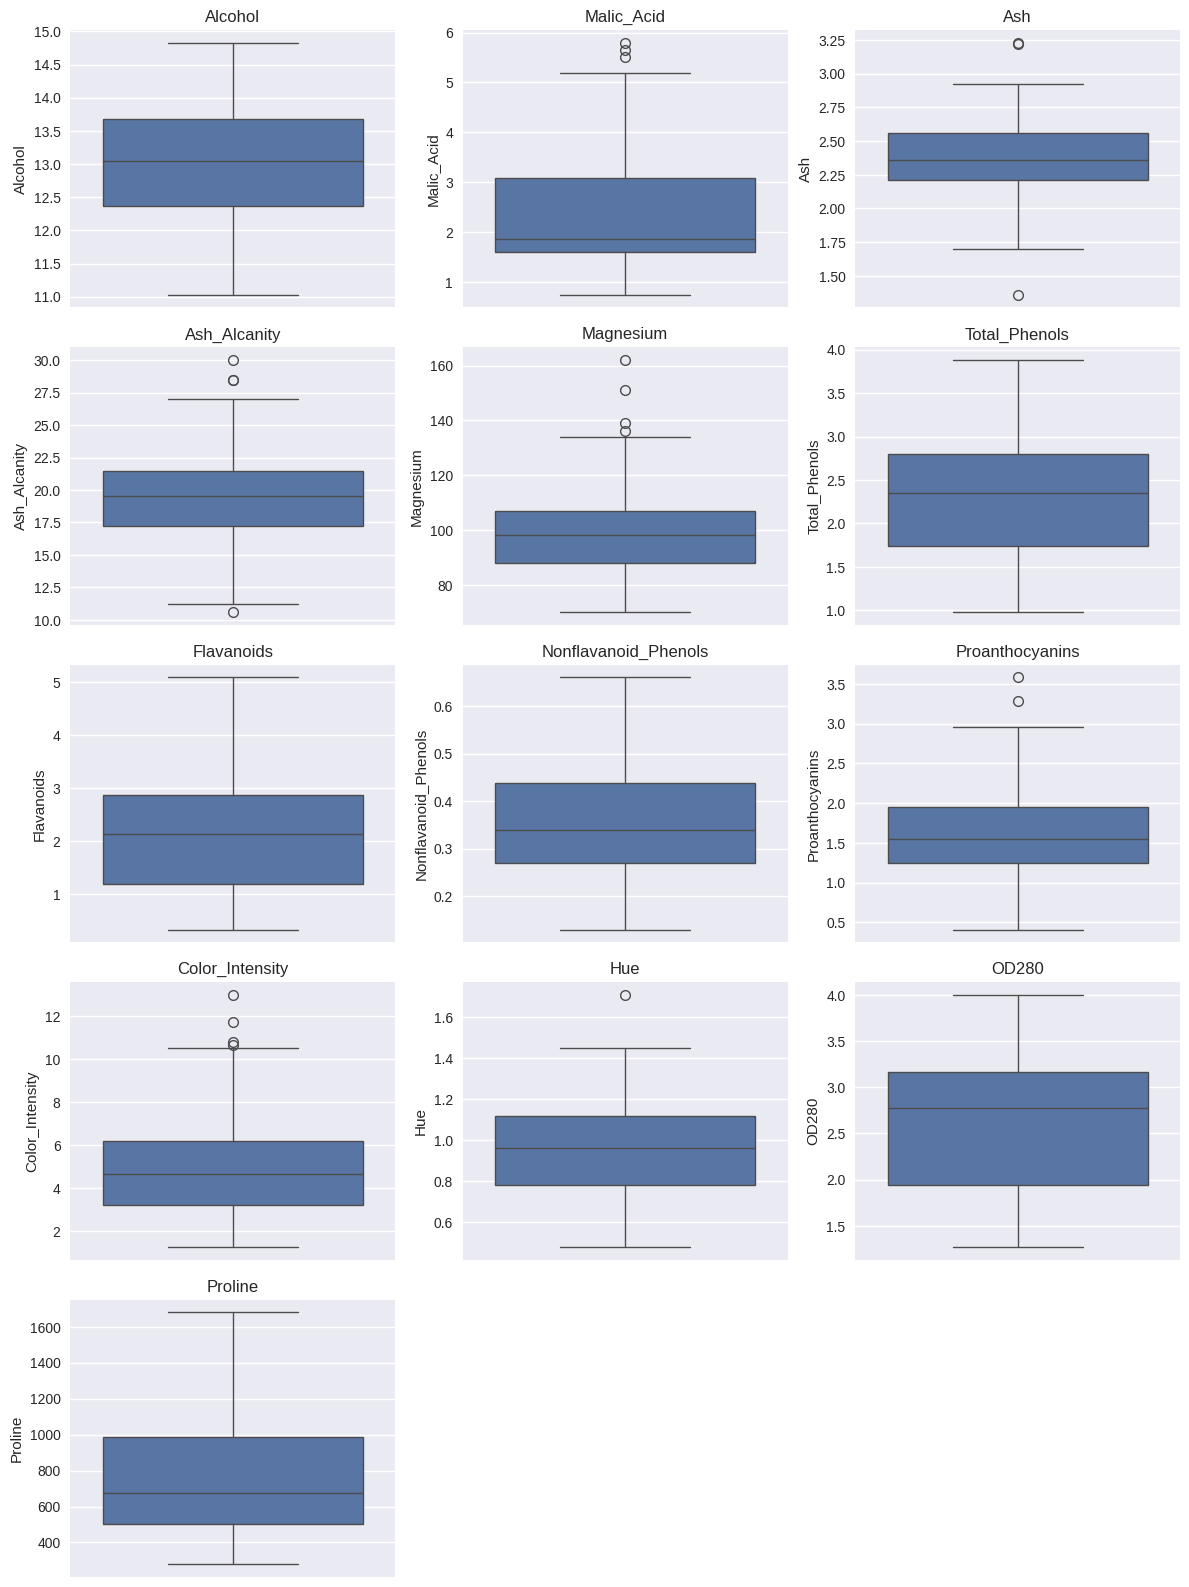

In [ ]:
plt.figure(figsize=(12, 16))

# Loop through each column and create a boxplot
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(5, 3, df.columns.get_loc(column) + 1)
        sns.boxplot(y=df[column])
        plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
#hapus outliers
for column in range(len(df.columns)):
    q75, q25 = np.percentile(df[df.columns[column]], [75, 25])
    iqr = q75 - q25
    iqrMin = q25 - (iqr * 1.5)
    iqrMax = q75 + (iqr * 1.5)
    print(df.columns[column])
    print(f"iqrMin {iqrMin}")
    print(f"iqrMax {iqrMax}")
    print(f"count IqrMin: {len(df[df[df.columns[column]] < iqrMin])}")
    print(f"count IqrMax: {len(df[df[df.columns[column]] > iqrMax])}")
    df = df.drop(df[df[df.columns[column]] < iqrMin].index, axis=0)
    df = df.drop(df[df[df.columns[column]] > iqrMax].index, axis=0)

Alcohol
iqrMin 10.389999999999997
iqrMax 15.650000000000002
count IqrMin: 0
count IqrMax: 0
Malic_Acid
iqrMin -0.6174999999999997
iqrMax 5.3025
count IqrMin: 0
count IqrMax: 3
Ash
iqrMin 1.6925000000000003
iqrMax 3.0724999999999993
count IqrMin: 1
count IqrMax: 2
Ash_Alcanity
iqrMin 10.687500000000002
iqrMax 27.987499999999997
count IqrMin: 0
count IqrMax: 2
Magnesium
iqrMin 59.5
iqrMax 135.5
count IqrMin: 0
count IqrMax: 3
Total_Phenols
iqrMin 0.07500000000000018
iqrMax 4.435
count IqrMin: 0
count IqrMax: 0
Flavanoids
iqrMin -1.3099999999999996
iqrMax 5.409999999999999
count IqrMin: 0
count IqrMax: 0
Nonflavanoid_Phenols
iqrMin 0.017500000000000043
iqrMax 0.6775
count IqrMin: 0
count IqrMax: 0
Proanthocyanins
iqrMin 0.23750000000000027
iqrMax 2.9374999999999996
count IqrMin: 0
count IqrMax: 2
Color_Intensity
iqrMin -1.1999999999999997
iqrMax 10.719999999999999
count IqrMin: 0
count IqrMax: 3
Hue
iqrMin 0.3012499999999998
iqrMax 1.6112500000000003
count IqrMin: 0
count IqrMax: 1
OD280


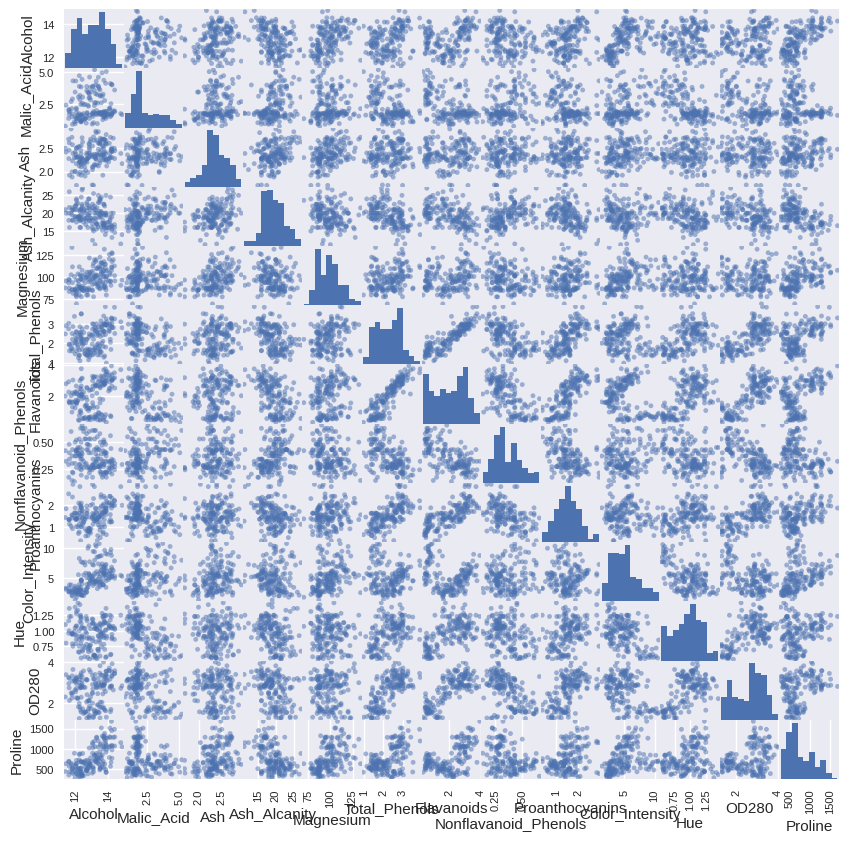

In [ ]:
plt.style.use("seaborn-v0_8")
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

# Perform Min-Max Scaling

In [ ]:
X = MinMaxScaler().fit_transform(df)

In [ ]:
df_minmax = pd.DataFrame(data = X, columns = df.columns.tolist())

In [ ]:
df_minmax

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.824561,0.217978,0.598361,0.278481,0.890625,0.627586,0.757660,0.283019,0.752,0.463830,0.549451,0.970696,0.561341
1,0.523392,0.233708,0.360656,0.000000,0.468750,0.575862,0.674095,0.245283,0.348,0.329787,0.560440,0.780220,0.550642
2,0.511696,0.364045,0.795082,0.468354,0.484375,0.627586,0.807799,0.320755,0.960,0.468085,0.538462,0.695971,0.646933
3,0.865497,0.271910,0.655738,0.354430,0.671875,0.989655,0.877437,0.207547,0.708,0.693617,0.351648,0.798535,0.857347
4,0.535088,0.415730,0.959016,0.620253,0.750000,0.627586,0.654596,0.490566,0.564,0.323404,0.549451,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.804094,0.397753,0.639344,0.556962,0.328125,0.241379,0.100279,0.584906,0.332,0.895745,0.087912,0.161172,0.272468
157,0.581871,0.712360,0.639344,0.746835,0.500000,0.282759,0.114206,0.566038,0.400,0.640426,0.175824,0.106227,0.336662
158,0.543860,0.795506,0.459016,0.556962,0.781250,0.210345,0.097493,0.566038,0.376,0.948936,0.054945,0.106227,0.397290
159,0.514620,0.415730,0.549180,0.556962,0.781250,0.231034,0.094708,0.754717,0.420,0.853191,0.065934,0.128205,0.400856


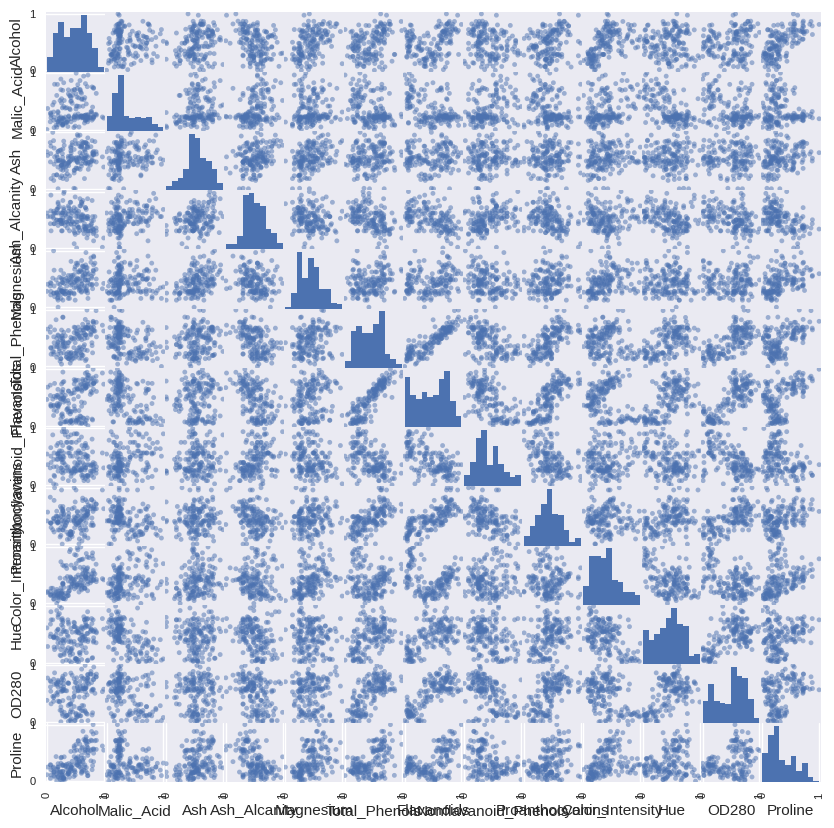

In [ ]:
pd.plotting.scatter_matrix(df_minmax, figsize=(10, 10))
plt.show()

### Clustering

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

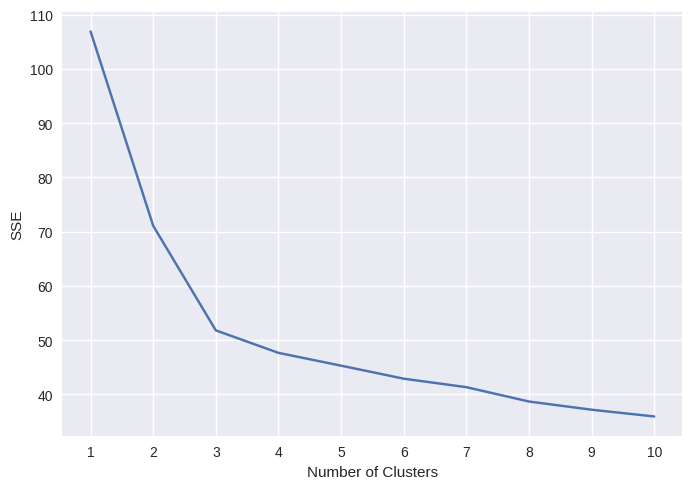

In [ ]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

### Silhouette Coefficient

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

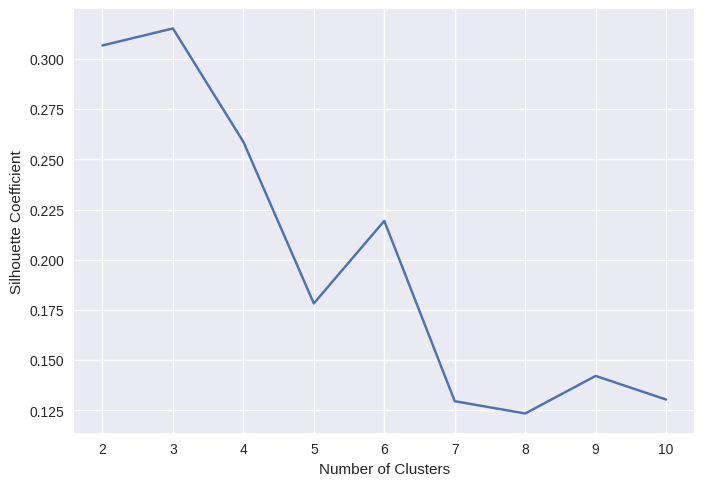

In [ ]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### The Actual Clustering

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)

51.79270388973834
[[0.49663107 0.57376649 0.5735923  0.62341772 0.44904891 0.22826087
  0.1280126  0.60008203 0.27104348 0.60555041 0.17606307 0.15504061
  0.24451095]
 [0.25352894 0.2483921  0.4584511  0.56885639 0.32947198 0.43483948
  0.48117376 0.43266103 0.46034483 0.18417095 0.57230011 0.56928129
  0.1627478 ]
 [0.68297938 0.2859452  0.60943342 0.36620031 0.56414474 0.6399274
  0.73430093 0.2959285  0.58814035 0.4519037  0.56969346 0.69224343
  0.59569037]]
5


In [ ]:
membership = kmeans.labels_

In [ ]:
membership.dtype

dtype('int32')

### PCA

In [316]:
from sklearn.decomposition import PCA

In [317]:
pca   = PCA()
x_pca = pca.fit_transform(X)

In [318]:
pca.explained_variance_ratio_

array([0.4200067 , 0.20156212, 0.07544459, 0.07044347, 0.05312537,
       0.04216554, 0.03063234, 0.02684482, 0.02281622, 0.02016318,
       0.01562824, 0.01401735, 0.00715007])

In [319]:
x_pca.shape

(161, 13)

### Cluster Visualization

In [320]:
pc = pd.DataFrame(x_pca[:,:2], columns=['pc1', 'pc2'])

In [321]:
pale_green  = ['#90ee90']
yellow      = ['#ffff66']
magenta     = ['#c20078']

clust_colors = pale_green + yellow + magenta

In [322]:
colors = [clust_colors[m] for m in membership]

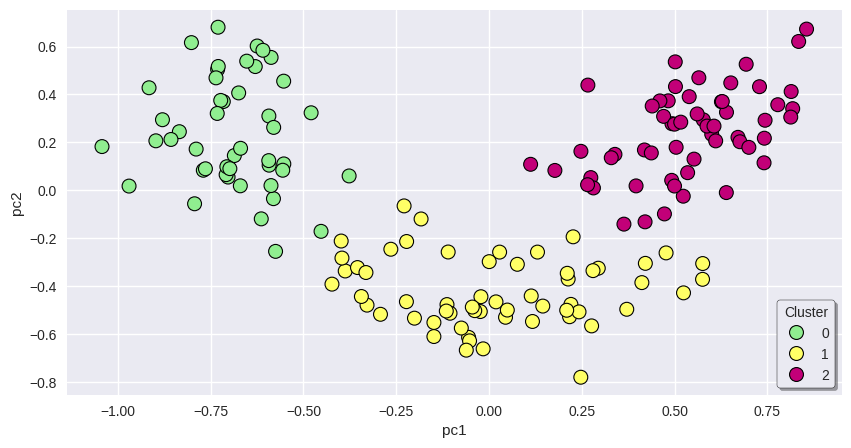

In [323]:
data_pca = pc.copy()
data_pca['Cluster'] = membership


plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x='pc1', y='pc2', hue='Cluster', palette=clust_colors, data=data_pca, s=100, marker='o', edgecolor='k')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title="Cluster", loc="lower right",frameon=True, fancybox=True, edgecolor='black', shadow=True)
plt.show()

Comparison with Variance of Original (Scaled) Data

In [324]:
pca_features = pd.DataFrame(x_pca, columns=['pc'+str(i) for i in range(1, x_pca.shape[1]+1)])
# pca_features = pd.DataFrame(x_pca, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
pca_features

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,0.778109,0.357287,0.035255,-0.002813,-0.053862,0.111331,0.141537,-0.071134,-0.156401,-0.317372,0.083484,-0.066889,-0.015524
1,0.523341,-0.024141,-0.349671,-0.080783,-0.015316,0.277037,0.138876,-0.173050,0.096895,0.070859,-0.008224,-0.122001,0.022659
2,0.600106,0.234016,0.266428,-0.052911,0.112227,-0.219015,0.032695,0.101362,0.230803,-0.115137,-0.044709,-0.044290,-0.000195
3,0.855620,0.672589,0.019247,-0.107344,0.025174,-0.122040,0.017179,-0.207407,0.007026,0.063337,0.026090,0.108074,-0.098292
4,0.247602,0.162994,0.470457,0.200636,-0.037053,0.004392,0.143786,0.022412,-0.126674,-0.013677,-0.055632,-0.023526,0.005125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-0.629980,0.516316,-0.209691,-0.012214,0.062243,-0.183169,-0.223831,-0.071333,-0.117583,-0.032383,-0.049296,-0.173206,-0.061445
157,-0.674704,0.406482,0.112384,-0.063123,0.011688,-0.034247,-0.055874,0.114252,0.029152,-0.013829,0.001724,0.088430,-0.075279
158,-0.730234,0.680386,-0.097986,-0.181983,-0.094501,-0.014172,0.201582,0.109188,0.031136,-0.074772,0.223027,0.033939,-0.001425
159,-0.653013,0.538901,-0.148557,0.101018,-0.067125,-0.203845,0.235425,-0.049306,-0.019836,-0.199798,0.122261,0.027022,-0.031735


In [325]:
df_minmax_vars = df_minmax.var()

In [326]:
df_minmax_vars

,0
Alcohol,0.053551
Malic_Acid,0.056037
Ash,0.039322
Ash_Alcanity,0.035433
Magnesium,0.037547
Total_Phenols,0.047039
Flavanoids,0.074735
Nonflavanoid_Phenols,0.052831
Proanthocyanins,0.042245
Color_Intensity,0.052568


In [327]:
df_minmax_varsum = sum(df_minmax_vars)

In [328]:
-np.sort(-np.array([a/df_minmax_varsum for a in df_minmax_vars]))

array([0.11187067, 0.10222254, 0.08541551, 0.08388148, 0.08016019,
       0.07908323, 0.07868953, 0.07692208, 0.07041254, 0.06323645,
       0.05886079, 0.05620468, 0.0530403 ])

### Clustering on Principal Components

On all pca features

In [329]:
kmeans_pca_all = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [330]:
kmeans_pca_all.fit(pca_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [331]:
# The lowest SSE value
print(kmeans_pca_all.inertia_)

# Final locations of the centroid
print(kmeans_pca_all.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_all.n_iter_)

51.79270388973834
[[-6.89729570e-01  2.36165815e-01 -3.18495079e-02 -2.67967466e-02
  -1.16208060e-02 -1.39705475e-02 -8.86390208e-03  4.20953871e-03
  -6.60554362e-03  1.14239894e-02 -2.42063040e-03 -6.63527011e-03
  -1.15239822e-02]
 [ 1.73998109e-02 -4.22300596e-01  3.19984789e-02 -1.06416690e-03
  -1.10823869e-02 -2.94457245e-02  8.35240564e-03  1.43852572e-02
  -1.36470222e-02  4.40786890e-04  8.98071503e-03  5.20356141e-03
   1.84625750e-03]
 [ 5.38918793e-01  2.39119422e-01 -6.85674407e-03  2.27082811e-02
   2.06550091e-02  4.12367931e-02 -1.34561459e-03 -1.80348017e-02
   1.92172333e-02 -9.66787988e-03 -7.18478023e-03  5.99274335e-05
   7.42140786e-03]]
5


On the first PCA feature

In [332]:
kmeans_pca_first = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [333]:
kmeans_pca_first.fit(pca_features.pc1.values.reshape(-1, 1))

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [334]:
# The lowest SSE value
print(kmeans_pca_first.inertia_)

# Final locations of the centroid
print(kmeans_pca_first.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first.n_iter_)

4.030796478131984
[[ 0.56930251]
 [-0.64244848]
 [ 0.0448395 ]]
6


On first two PCA features

In [335]:
kmeans_pca_first2 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [336]:
kmeans_pca_first2.fit(pca_features[['pc1', 'pc2']])

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [337]:
# The lowest SSE value
print(kmeans_pca_first2.inertia_)

# Final locations of the centroid
print(kmeans_pca_first2.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first2.n_iter_)

11.763213185407446
[[-0.68972957  0.23616581]
 [-0.00077861 -0.4272837 ]
 [ 0.53849428  0.22142813]]
11


On first three PCA features

In [338]:
kmeans_pca_first3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [339]:
kmeans_pca_first3.fit(pca_features[['pc1', 'pc2']])

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [340]:
# The lowest SSE value
print(kmeans_pca_first3.inertia_)

# Final locations of the centroid
print(kmeans_pca_first3.cluster_centers_)

# The number of iterations required to converge
print(kmeans_pca_first3.n_iter_)

11.763213185407446
[[-0.68972957  0.23616581]
 [-0.00077861 -0.4272837 ]
 [ 0.53849428  0.22142813]]
11


### Calculation of the Agreement between Clustering on All Data and Results of PCA

In [341]:
from sklearn.metrics import v_measure_score

Between clustering of original scaled data and all PCA components:

In [342]:
v_measure_score(kmeans.labels_, kmeans_pca_all.labels_)

1.0

Between clustering of original scaled data and the first PCA component:

In [343]:
v_measure_score(kmeans.labels_, kmeans_pca_first.labels_)

0.6345635198419558

Between clustering of original scaled data and the first two PCA components:

In [344]:
v_measure_score(kmeans.labels_, kmeans_pca_first2.labels_)

0.9504742888934481

Between clustering of original scaled data and the first three PCA components: